# What happens when a velociraptor attacks?

<img src="http://imgur.com/Y0teKdL.png">

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
my_initial_position = 100.
my_speed = 9.
observed_warcry = 1260.
actual_warcry = 1200.
speed_of_sound = 340.29

In [14]:
def doppler_velocity(f, f0, vs, c):
    """
    implements the solution for the relative velocity based on the 
    dopper effect.
    
    f = (c + vr)/(c + vs) *f0
    f/f0 = (c + vr)/(c + vs)
    (f/f0)*(c + vs) = c + vr
    (f/f0)*(c + vs) - c = vr
    
    returns vr
    
    f : observed frequency
    f0: actual frequency
    c : speed of sound in media
    vs: speed of observer
    vr: speed of sound source
    """
    return abs((f/f0)*(c + vs) - c)

def position(x0, v, dt):
    """
    calculates 1D position update
    """
    return x0 + v * dt

In [12]:
raptor_v = doppler_velocity(observed_warcry, actual_warcry, my_speed, speed_of_sound)
raptor_v

26.464500000000044

In [18]:
position(my_initial_position, my_speed, 1)

109.0

In [19]:
position(0, raptor_v, 1)

26.464500000000044

In [24]:
time_range = np.arange(0, 13, 0.1)

my_pos = []
rap_pos = []

for dt in time_range:
    my_pos.append(position(my_initial_position, my_speed, dt))
    rap_pos.append(position(0, raptor_v, dt))
    
df = pd.DataFrame({'my position':my_pos, 'raptor position':rap_pos, 'dt':time_range})
df.set_index('dt', inplace=True)

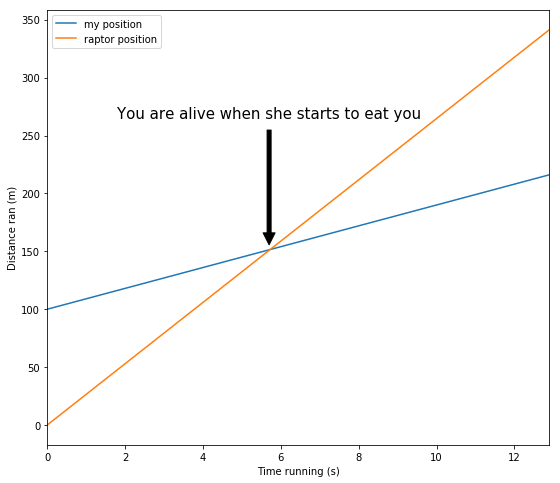

In [40]:
fig, ax = plt.subplots(figsize=(9, 8))
df.plot(ax=ax)

ax.set_ylabel('Distance ran (m)')
ax.set_xlabel('Time running (s)')

ax.annotate(s='You are alive when she starts to eat you', xy=( 5.7, 150,), xytext=( 5.7, 275,)
            , arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='top', fontsize=15)